# 의사결정나무 실습

## 실습1(유방암 데이터 활용)

#### [reference]

[참고1](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=winddori2002&logNo=221659080425)  
[참고2](https://inuplace.tistory.com/548)  
[Graphviz 설치](https://kbj96.tistory.com/26)  

In [42]:
# 필요한 패키지 로드
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])

In [8]:
# 데이터 불러오기
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [24]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
# 데이터 분할
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [17]:
# 모델 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# 모델 평가
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9415204678362573


In [19]:
# 모델 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

predict = model.predict(X_test)

acc = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict)
matrix = confusion_matrix(y_test, predict)

print('Accuracy: {:.3f}'.format(acc))
print('F1 score: {:.3f}'.format(f1))
print(matrix)

Accuracy: 0.942
F1 score: 0.951
[[63  6]
 [ 4 98]]


In [20]:
# 교차 검증
scores = cross_val_score(estimator=DecisionTreeClassifier(),
               cv = 5,
               X=X, y=y)

print('교차검증 점수: {}'.format(scores))
print('교차검증 평균 점수: {:.3f}'.format(scores.mean()))

교차검증 점수: [0.9122807  0.9122807  0.9122807  0.94736842 0.90265487]
교차검증 평균 점수: 0.917


In [21]:
# GridSearchCV

model = DecisionTreeClassifier(random_state=33)
param_grid = {'max_depth':[1, 3, 5, 7],
             'min_samples_split':[3, 5],
             'splitter':['best', 'random']}

gs = GridSearchCV(estimator=model,
                 param_grid=param_grid,
                 cv=5,
                 n_jobs = -1 # 모든 cpu 사용
                 )
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=33), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7], 'min_samples_split': [3, 5],
                         'splitter': ['best', 'random']})

In [22]:
print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))
pd.DataFrame(gs.cv_results_)[['mean_test_score']].sort_values(by='mean_test_score', ascending=False).head()

최적 점수: 0.9297158826269213
최적 파라미터: {'max_depth': 5, 'min_samples_split': 3, 'splitter': 'random'}


,mean_test_score
9,0.929716
5,0.926238
7,0.926238
15,0.924453
4,0.924375


In [23]:
# 하이퍼파라미터 추가 설정
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [3, 5, 7, 9],
             'min_samples_split': [x for x in range(3, 15, 2)], # 자식노드를 분할하는데 필요한 최소 샘플수
             'min_samples_leaf': [x for x in range(1, 15, 2)], # 리프노드가 될 수 있는 최소 샘플수
             'max_features': ['auto', 'sqrt', 'log2'], # 각 노드에서 분할에 사용할 특징의 최대 수
              # default는 None으로 데이터 세트의 모든 feature을 사용하여 분할. int로 지정 시 대상 feature 개수, float로 지정 시 전체 feature중 대상 feature의 퍼센트
              # sqrt는 전체 feature중 제곱근 값. auto는 sqrt와 동일. log는 전체 featur을 log2()로 선정
             'class_weight': ['balanced', None],
             'splitter': ['best', 'random']} # 노드를 분할하기 위한 기준값 설정(default = Best)

gs = GridSearchCV(estimator=model,
                 param_grid=param_grid,
                 cv=5,
                 n_jobs = -1 # 모든 cpu 사용
                 )
gs.fit(X, y)

print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))
pd.DataFrame(gs.cv_results_)[['mean_test_score']].sort_values(by='mean_test_score', ascending=False).head()

최적 점수: 0.9525694767893185
최적 파라미터: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


,mean_test_score
1848,0.952569
1764,0.952569
3650,0.950846
3820,0.950846
3658,0.950846


In [24]:
gs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features='auto', min_samples_split=3,
                       random_state=33)

In [25]:
# 시각화
model = gs.best_estimator_
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.935672514619883


In [34]:
dot_data = tree.export_graphviz(decision_tree = model, # 의사결정나무 모형 대입
                               feature_names = cancer.feature_names,
                               class_names = cancer.target_names,
                               filled = True, # 색 채우기
                               rounded = True, # 반올림 지정
                               special_characters =True # 특수문자 설정
                               )

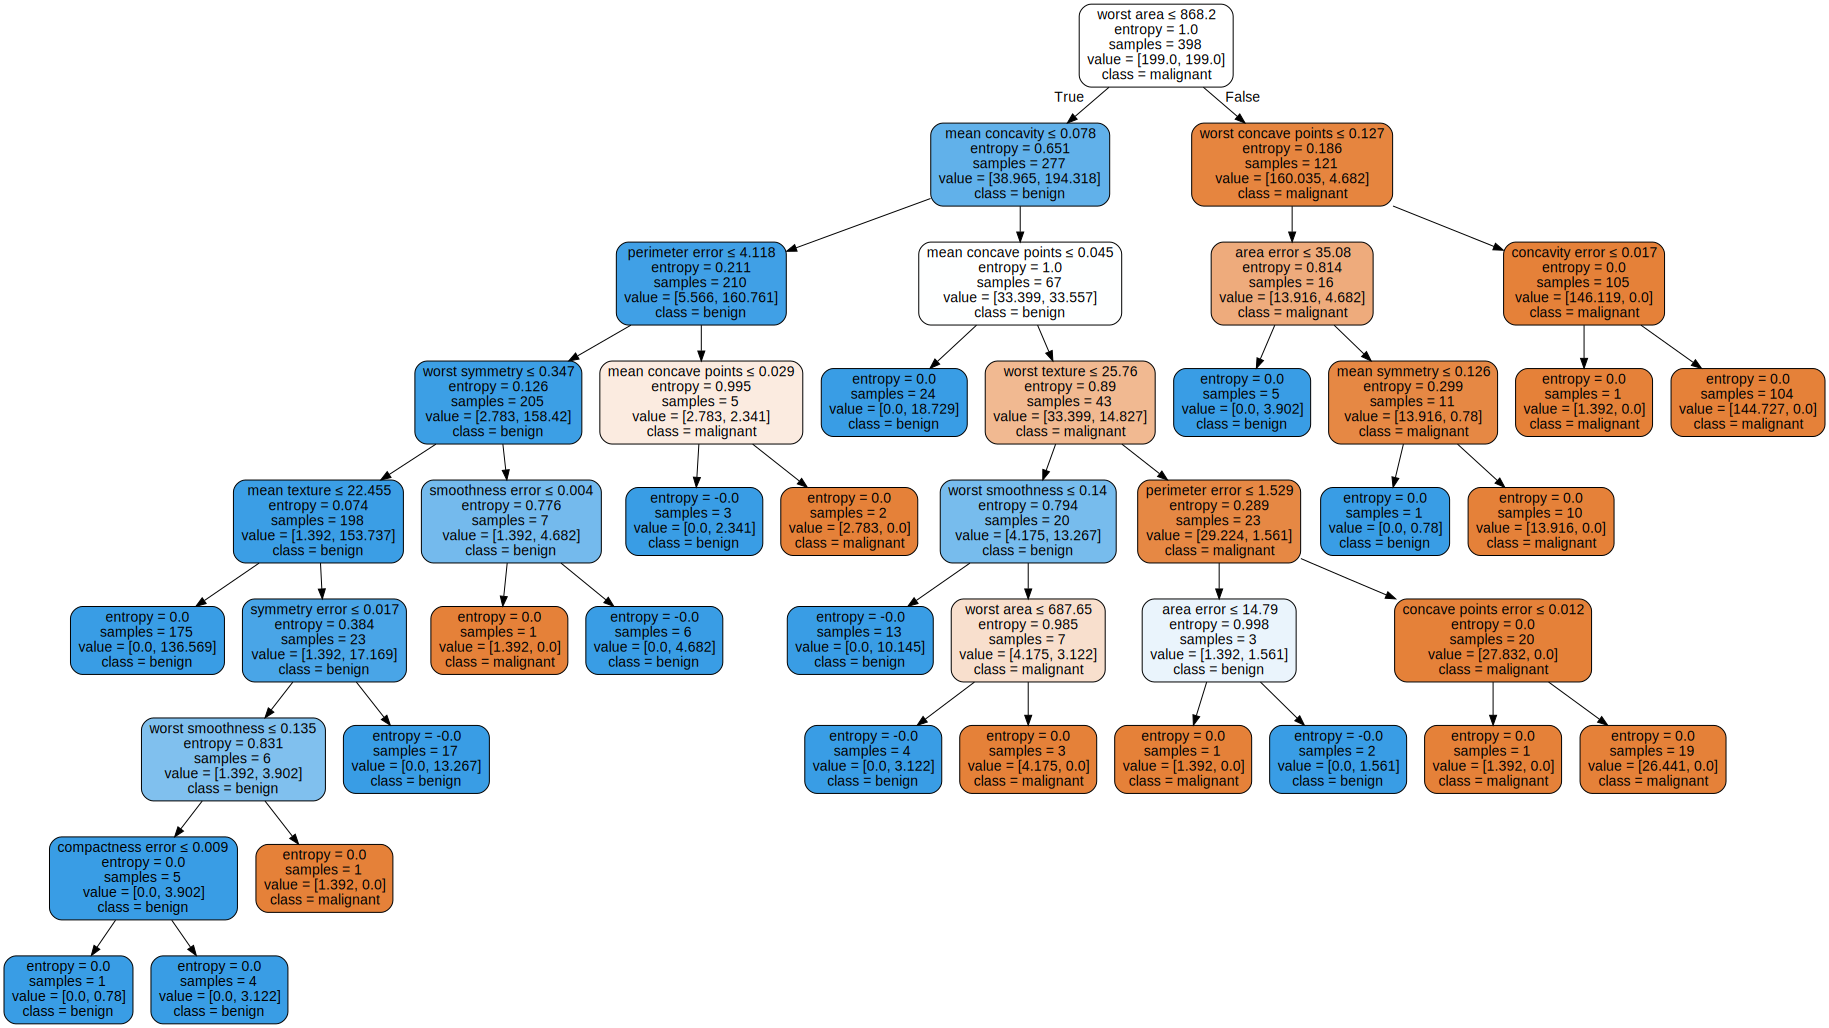

In [35]:
graph = graphviz.Source(dot_data)
graph

mean radius : 0.000
mean texture : 0.011
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.125
mean concave points : 0.073
mean symmetry : 0.011
mean fractal dimension : 0.000
radius error : 0.000
texture error : 0.000
perimeter error : 0.040
area error : 0.034
smoothness error : 0.012
compactness error : 0.000
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.007
fractal dimension error : 0.000
worst radius : 0.000
worst texture : 0.051
worst perimeter : 0.000
worst area : 0.559
worst smoothness : 0.028
worst compactness : 0.000
worst concavity : 0.000
worst concave points : 0.039
worst symmetry : 0.010
worst fractal dimension : 0.000


<AxesSubplot:>

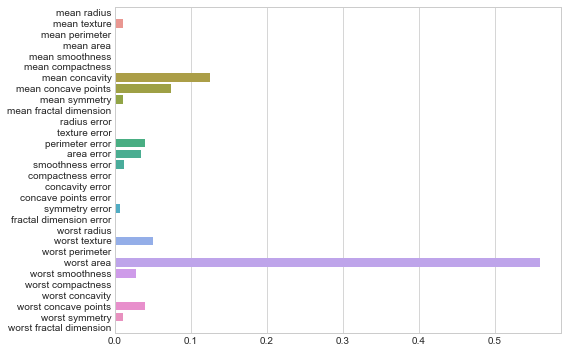

In [71]:
# 특성 중요도 파악
# 트리 분류 모델 형성에 각 특성이 얼마나 작용했는지 평가하는 지표
# 0~1 사이 값
# 특성 중요도 전체 합 = 1

# feature별 importance 매핑
for name, value in zip(cancer.feature_names, model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))
    
# feature importance를 column별로 시각화하기
plt.figure(figsize=(8,6))
sns.barplot(x=model.feature_importances_, y = cancer.feature_names)

<AxesSubplot:>

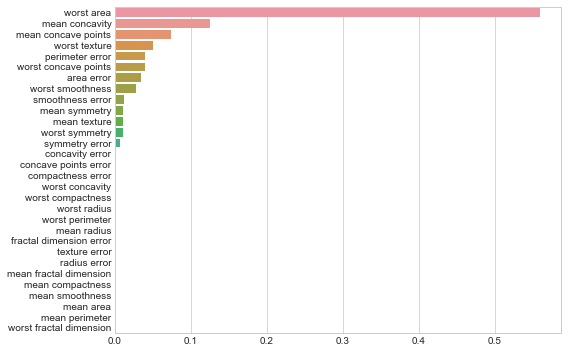

In [72]:
# 중요도가 큰 순서대로 정렬

df1 = pd.DataFrame(cancer.feature_names)
df2 = pd.DataFrame(model.feature_importances_)
df3 = pd.concat([df1, df2], axis=1)
df3.columns = ['name', 'value']

order_list = df3.sort_values(by='value', ascending=False)['name'].tolist()
order_list

# 중요도 순으로 다시 시각화
plt.figure(figsize=(8,6))
sns.barplot(x=model.feature_importances_, y = cancer.feature_names, order = order_list)

변수의 중요도가 높으면 상위모드로 가고, 낮다면 하위노드로 간다.

---

## 실습2(iris 데이터 활용)

#### [reference]

[참고1](https://todayisbetterthanyesterday.tistory.com/38)  
[참고2](https://velog.io/@lsmmay322/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree)

### 1. 의사결정분류나무 기초 실습

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
import multiprocessing

In [72]:
# 데이터 불러오기 및 분할
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
# before scaling 
model1 = tree.DecisionTreeClassifier()
model1.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model1.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model1.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9333333333333333


In [4]:
# after scaling 

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model1 = tree.DecisionTreeClassifier()
model1.fit(X_train_scale, y_train)

print('학습 데이터 점수: {}'.format(model1.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model1.score(X_test_scale, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9555555555555556


**의사결정나무는 scale 전후에 차이가 없다.**

In [6]:
# 교차 검증
scores = cross_val_score(
    estimator=model1, 
    X=iris.data, y=iris.target,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5)

print('교차 검증 점수: {}'.format(scores))
print('교차 검증 평균 점수: {}'.format(scores.mean()))

교차 검증 점수: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
교차 검증 평균 점수: 0.9600000000000002


In [7]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier())

scores = cross_val_score(
    estimator=model, 
    X=iris.data, y=iris.target,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5)

print('교차 검증 점수: {}'.format(scores))
print('교차 검증 평균 점수: {}'.format(scores.mean()))

교차 검증 점수: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
교차 검증 평균 점수: 0.9600000000000002


### 2. 의사결정분류나무
#### (1) 기본적인 의사결정나무: Information Gain - Gini

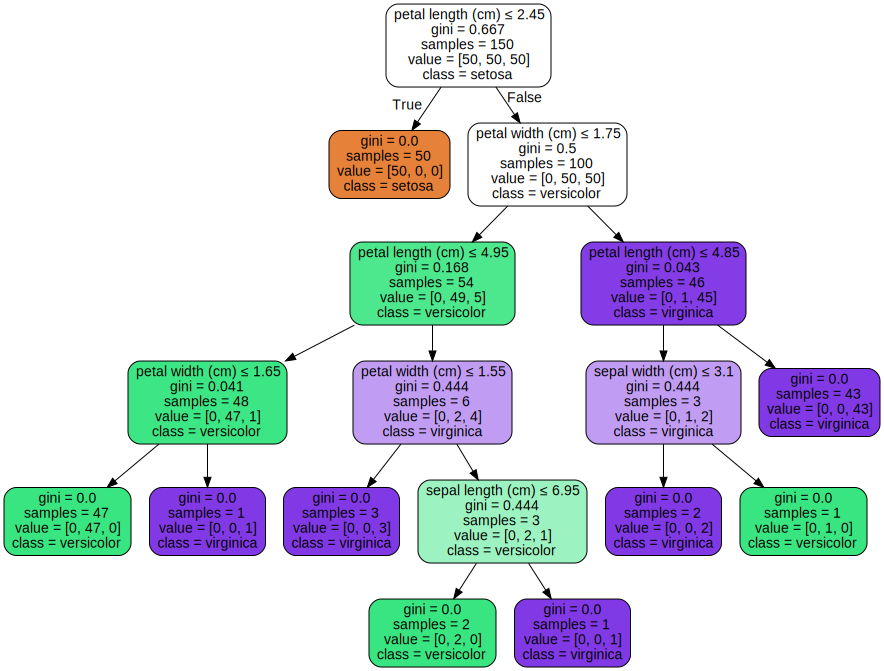

In [74]:
# 시각화

model1 = tree.DecisionTreeClassifier()
model1.fit(iris.data, iris.target)

import graphviz
dot_data = tree.export_graphviz(decision_tree = model1, # 의사결정나무 모형 대입
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, # 색 채우기
                               rounded = True, # 반올림 지정
                               special_characters =True # 특수문자 설정
                               )

graph = graphviz.Source(dot_data)
graph

가장 기본적인(아무런 매개변수를 주지 않았을 때) Information Gain 방식은 지니계수를 이용한다. 도식화된 Tree를 살펴보면 gini = xxx 가 써있음을 통해 알 수 있다. 이 gini계수는 엔트로피와 마찬가지로 낮을 수록 분류가 잘 된것으로 판단하며 기본적으로 의사결정나무는 이 Information Gain을 낮추는 방향으로 분류를 진행한다. 

#### (2) Information Gain - entropy 의사결정나무

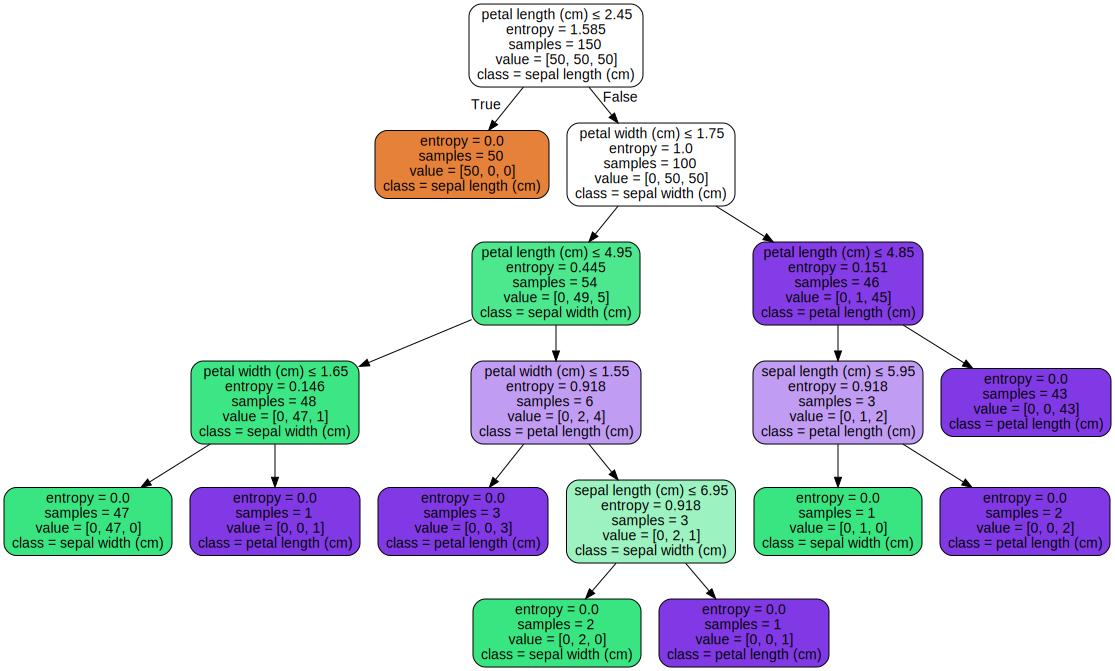

In [75]:
# 시각화

model2 = tree.DecisionTreeClassifier(criterion='entropy') # Information Gain - entropy
model2.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(model2,
                               feature_names=iris.feature_names,
                               class_names=iris.feature_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

과정은 지니와 모두 동일하나 DecisionTreeClassifier()을 생성할 때 매개변수로 criterion = "entropy"만 추가하였다.  
즉, 의사결정나무의 분류 기준을 entropy로 한다는 것이다. 이제 위의 결과표를 보면 gini가 아니라 entropy가 쓰인 것을 확인할 수 있다.

위의 두 의사결정나무 모형은 너무 많은 노드들이 존재한다. 게다가 마지막 노드에서 gini와 entropy 모두 0.0을 출력한다. 이는 완벽하게 분리시켰다고 말할 수 도 있지만, 사실 억지로 분류시킨 것에 가깝다. 그렇기에 과적합(Overfitting)이 발생한 것이다.  
추가적으로 한 가지 더 알아야 할 것이 있다. 위의 색은 3가지 색의 계열로 이루어져 있다. 같은 색 계열이면 같은 집단으로 분류를 한 것이며, 색이 진할수록 Information Gain(entropy, gini .. )이 낮은 것이다. 즉, 정확하게 분류를 했다는 것이다. 이는 상대적이기에 depth가 작으면 entropy가 높아도 진하게 출력될 수 있다.  

이제 pruning(가지치기)라는 기법을 배워서 과적합을 방지하도록 학습해보자.



#### (3) Pruning - 가지치기

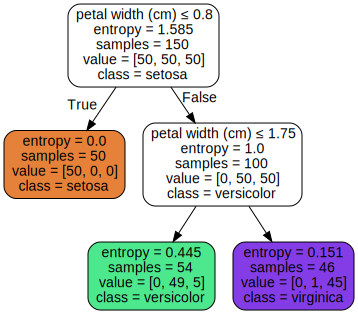

In [76]:
# Pruning
model3 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
model3.fit(iris.data, iris.target)

# 시각화
dot_data3 = tree.export_graphviz(model3,        # file로 변환할 것인가
                               feature_names = iris.feature_names,  # feature 이름
                               class_names = iris.target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph3 = graphviz.Source(dot_data3)              
graph3

max_depth를 2로 주었더니, 트리의 깊이가 2로 변했다. 그리고 entropy 또한 0.4/0.151로 많이 높아졌다. 위의 DecisionTree의 gini/entropy는 0.0이었는데 분류가 너무 안된 것이 아닌가? 라고 생각할 수 있다.  
하지만, 우리는 여태 train데이터를 예측했다. 그렇기에 학습데이터의 경우 가지가 무한정 많아지면 정확해질 수 밖에 없다. 만약 새로운 test데이터가 주어진다면, 오히려 과적합된 DecisionTree가 학습데이터 내에서 너무 이상값들에 집중해서 일반적인 새로운 test데이터를 제대로 예측하지 못할 수도 있다.  
게다가 이 짧은 트리가 거창한 트리보다 훨씬 직관적이고 이해도가 높다. Decision Tree를 사용하는 가장 큰 이유중 하나가 바로 "직관적인 이해"인데 가지치기를 하지않고 무한한 가지를 만들면 Decision Tree를 사용하는 의미 또한 퇴색된다. 

이제 Confusion matrix를 활용하여 3가지 분류기의 학습데이터를 분류하는 정확도를 확인해보자.

#### (4) Confusion matrix를 활용한 정확도 비교

In [12]:
from sklearn.metrics import confusion_matrix

# 1번 의사결정나무 - 지니계수 활용
confusion_matrix(iris.target, model1.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [13]:
# 2번 의사결정나무 - 지니계수 활용
confusion_matrix(iris.target, model2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [14]:
# 3번 의사결정나무 - 지니계수 활용
confusion_matrix(iris.target, model3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

위의 결과를 보면 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다. 하지만 학습데이터를 분류한 것이라는 사실을 염두해 두어야 한다. 만약 새로운 데이터가 들어오면 말했듯이 맨 마지막 가지치기의 의사결정나무가 일반화된 특징을  잡을 가능성이 높다.

In [81]:
# 정오분류표 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, model1.predict(X_test)), '\n--------------------------------------------------------------')
print(classification_report(y_test, model2.predict(X_test)), '\n--------------------------------------------------------------')
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
 

[[12  0  0]
 [ 0 15  0]
 [ 0  0 18]]


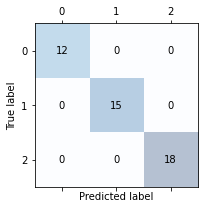

[[12  0  0]
 [ 0 15  0]
 [ 0  0 18]]


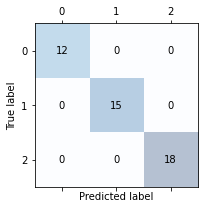

[[12  0  0]
 [ 0 15  0]
 [ 0  3 15]]


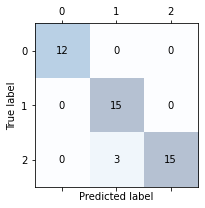

In [89]:
# 오차행렬 출력
from sklearn.metrics import confusion_matrix
confmat1 = confusion_matrix(y_true=y_test, y_pred=model1.predict(X_test))
print(confmat1)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat1, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat1.shape[0]): # 150, 13
  for j in range(confmat1.shape[1]): # 5, 132
    ax.text(x=j, y=i, s=confmat1[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

confmat2 = confusion_matrix(y_true=y_test, y_pred=model2.predict(X_test))
print(confmat2)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat2, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat2.shape[0]): # 150, 13
  for j in range(confmat2.shape[1]): # 5, 132
    ax.text(x=j, y=i, s=confmat2[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

confmat3 = confusion_matrix(y_true=y_test, y_pred=model3.predict(X_test))
print(confmat3)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat3, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat3.shape[0]): # 150, 13
  for j in range(confmat3.shape[1]): # 5, 132
    ax.text(x=j, y=i, s=confmat3[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#### (5) Traing Set / Test Set 구분

여태까진 전부 학습데이터로 분류를 진행했지만 실제 데이터가 주어졌을 때, 데이터는 Train/(Validation)/Test로 나누어 학습할 가능성이 크다. 그렇기에 Train set과 Test set을 나누어 실습해보자.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                      iris.target, 
                                                      test_size=.3,
                                                     random_state=1)

In [23]:
model4 = tree.DecisionTreeClassifier(criterion = 'entropy')
model4.fit(X_train, y_train)

confusion_matrix(y_test, model4.predict(X_test))

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

confusion matrix결과를 보면 가지치기를 하지 않았는데도 불구하고 3번에서 한 경우에 오분류가 발생했다. 이는 train data set과 test data set의 특성이 어느정도 달라서 학습의 분류결과가 완전하게 맞을 순 없다는 것을 보여준다. 

---
## 실습3(boston 데이터 활용)
### 의사결정회귀나무

In [24]:
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import multiprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [44]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=33)

In [45]:
model = tree.DecisionTreeRegressor(random_state=33)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=33)

In [46]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.6595115086072707


In [47]:
# 교차검증
scores = cross_val_score(estimator=model,
               X=X, y=y,
               cv=5,
               n_jobs=multiprocessing.cpu_count())
print('교차검증 점수: {}'.format(scores))
print('교차검증 평균 점수: {}'.format(scores.mean()))

교차검증 점수: [ 0.64339306  0.42317824  0.64003223  0.42014113 -1.78112921]
교차검증 평균 점수: 0.06912309129453069


In [62]:
# GridSearchCV
param_grid = {'max_depth': [3,5,7,9,11],
             'min_samples_split': [x for x in range(3, 15, 2)],
             'min_samples_leaf': [x for x in range(1, 15, 2)],
             'max_features': ['auto', 'sqrt', 'log2'],
             'splitter': ['best', 'random']}

# param_grid = {'criterion': ['gini', 'entropy'],
#              'max_depth': [3, 5, 7, 9],
#              'min_samples_split': [x for x in range(3, 15, 2)], # 자식노드를 분할하는데 필요한 최소 샘플수
#              'min_samples_leaf': [x for x in range(1, 15, 2)], # 리프노드가 될 수 있는 최소 샘플수
#              'max_features': ['auto', 'sqrt', 'log2'], # 각 노드에서 분할에 사용할 특징의 최대 수
#               # default는 None으로 데이터 세트의 모든 feature을 사용하여 분할. int로 지정 시 대상 feature 개수, float로 지정 시 전체 feature중 대상 feature의 퍼센트
#               # sqrt는 전체 feature중 제곱근 값. auto는 sqrt와 동일. log는 전체 featur을 log2()로 선정
#              'class_weight': ['balanced', None],
#              'splitter': ['best', 'random']}

gs = GridSearchCV(estimator=model,
                 cv=5,
                 param_grid=param_grid,
                 n_jobs = -1)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=33), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [3, 5, 7, 9, 11, 13],
                         'splitter': ['best', 'random']})

DecisionTreeRegressor()은 'criterion'와 'class_weight'이 적용되지 않는다.

In [66]:
print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_))
print(gs.best_estimator_)
pd.DataFrame(gs.cv_results_).head()

최적 점수: 0.5591662433624882
최적 파라미터: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 11, 'splitter': 'random'}
DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=5,
                      min_samples_split=11, random_state=33, splitter='random')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002991,0.000631,0.000798,0.000399,3,auto,1,3,best,"{'max_depth': 3, 'max_features': 'auto', 'min_...",0.461605,0.752922,0.471444,0.392022,-0.610157,0.293567,0.468464,605
1,0.001595,0.000489,0.000798,0.000399,3,auto,1,3,random,"{'max_depth': 3, 'max_features': 'auto', 'min_...",0.493346,0.677887,0.234887,0.527924,0.007810,0.388371,0.237781,352
2,0.002990,0.000001,0.000998,0.000001,3,auto,1,5,best,"{'max_depth': 3, 'max_features': 'auto', 'min_...",0.461605,0.752922,0.471444,0.392022,-0.610157,0.293567,0.468464,605
3,0.001795,0.000399,0.000798,0.000399,3,auto,1,5,random,"{'max_depth': 3, 'max_features': 'auto', 'min_...",0.493346,0.677887,0.234887,0.527924,0.007810,0.388371,0.237781,352
4,0.002592,0.000488,0.000799,0.000399,3,auto,1,7,best,"{'max_depth': 3, 'max_features': 'auto', 'min_...",0.461605,0.752922,0.471444,0.392022,-0.610157,0.293567,0.468464,605


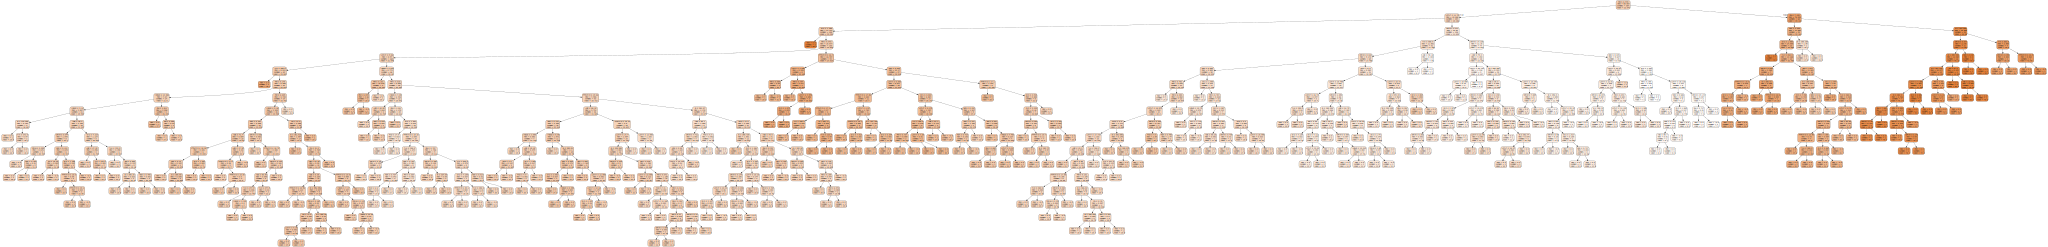

In [69]:
# 시각화
boston = load_boston()
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=boston.feature_names,
                               filled = True, rounded = True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

회귀나무에서는 회귀에 많이 사용하는 mse(mean squared error)가 기본적인 기준으로 작동한다. 즉, 회귀나무는 mse를 낮추는 방향으로 가지를 뻗어나아간다는 것이다. 

---
## 실습4

#### [reference]

[참고](https://datascienceschool.net/03%20machine%20learning/12.01%20%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.html#scikit-learn)  

#### 연습문제1
1. 붓꽃 분류 문제에서 꽃받침의 길이와 폭(sepal length, sepal width)을 사용하여 max_depth=3인 의사결정나무 모형을 만들고 정확도(accuracy)를 계산하라.

1. K=5 인 교차 검증을 통해 테스트 성능 평균을 측정하라.

1. max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [46]:
# 1번 문제
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)

print('accuracy score: {}'.format(model.score(X_test, y_test)))
print('accuracy score: {}'.format(acc))

accuracy score: 0.7555555555555555
accuracy score: 0.7555555555555555


In [47]:
# 2번 문제
scores = cross_val_score(estimator=model,
                        cv=5,
                        X=X, y=y,
                        n_jobs = -1)
print('교차검증 평균 점수: {}'.format(scores.mean()))

교차검증 평균 점수: 0.7466666666666666


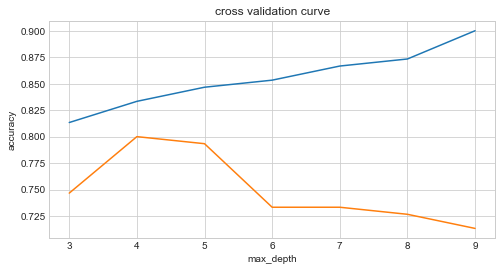

In [83]:
mean_test_accuracy = []
train_accuracy = []

for max_depth in np.arange(3, 10):
    model = tree.DecisionTreeClassifier(max_depth = max_depth).fit(X, y)
    train_accuracy.append(accuracy_score(y, model.predict(X)))
    mean_test_accuracy.append(cross_val_score(model, X, y, scoring="accuracy", cv=5).mean())

plt.figure(figsize=(8, 4))
plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.title('cross validation curve')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()
